# First approach

Import libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from sympy import Symbol
import copy as cp
import seaborn as sns

Read dataset

In [186]:
data=pd.read_excel("./Dataset/Flow_history.xls")
data=pd.DataFrame(np.array(data),columns=['Year','Flow','Height'])
data2 = data.dropna(axis='rows')

print(data2.describe())

# Data with all year/flow/height (height=NaN included)
data["year"]=data["Year"].to_numpy().astype(int)
data_year= data["Year"].to_numpy().astype(int)
data_flow = data["Flow"].to_numpy()
data_height = data["Height"].to_numpy()

# Data with all year/flow/height (height=NaN not included)
data2["Year"]=data2["Year"].to_numpy().astype(int)
data_year2= data2["Year"].to_numpy().astype(int)
data_flow2= data2["Flow"].to_numpy()
data_height2 = data2["Height"].to_numpy()

              Year         Flow      Height
count   123.000000   123.000000  123.000000
mean   1926.422764  1303.299533    3.896748
std      44.273740   681.342988    1.272337
min    1850.000000   122.435600    1.000000
25%    1886.500000   796.274404    3.100000
50%    1931.000000  1255.005113    3.900000
75%    1961.500000  1616.866106    4.750000
max    1997.000000  3361.255608    7.200000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16868\3004036139.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Year"]=data2["Year"].to_numpy().astype(int)


Data processing

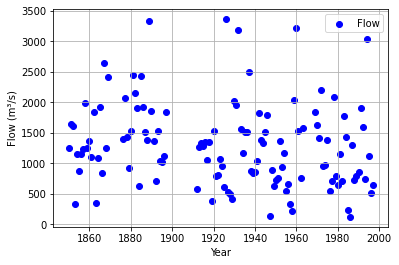

In [187]:
plt.figure()
plt.scatter(data_year2, data_flow2, color="blue", label="Flow")
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Flow (m³/s)")
plt.show()


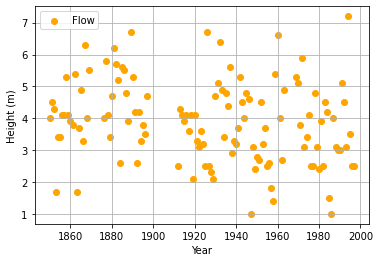

In [188]:
plt.figure()
plt.scatter(data_year2, data_height2, color="orange", label="Flow")
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Height (m)")
plt.show()

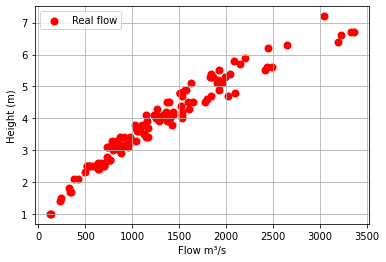

In [189]:
plt.figure()
plt.scatter(data_flow2, data_height2, color="red", label="Real flow",linewidths=2)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.legend()
plt.show()



Determining missing heights

In [190]:
regression=np.polyfit(data_flow2,data_height2,2)
predict=np.poly1d(regression)
x=Symbol('x')

Years=np.linspace(np.min(data_year),np.max(data_year),num=((np.max(data_year)-np.min(data_year)+1))).astype(int)
Flow=cp.deepcopy(data_flow)
Height=[]
for i in Years:
    if  i not in data_year2:
        Height.append(predict(data_flow[i-np.min(data_year)]))
    else:
        Height.append(data_height[i-np.min(data_year)])


# Plot predict and real values

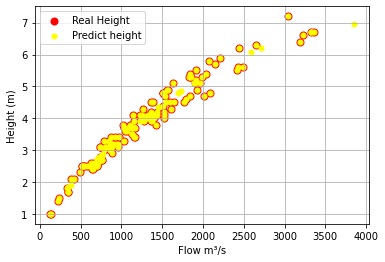

In [191]:
plt.figure()
plt.scatter(data_flow2, data_height2, color="red", label="Real Height",linewidths=2)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.scatter(Flow, Height, color="yellow", label="Predict height",linewidths=0.1)
plt.legend()
plt.show()

# Histogram

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


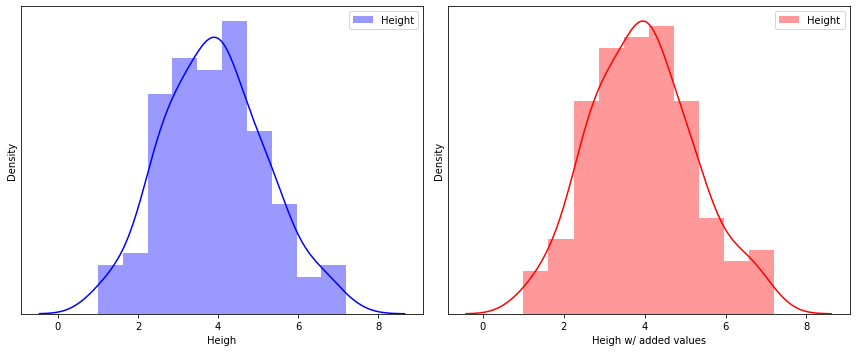

In [192]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.distplot(data_height2,color="blue",ax=ax[0],label='Height')
ax[0].set_yticks([])
ax[0].set_xlabel('Heigh')
ax[0].legend()
sns.distplot(Height,color="red",ax=ax[1],label='Height')
ax[1].set_yticks([])
ax[1].set_xlabel('Heigh w/ added values')
ax[1].legend()
plt.tight_layout()
plt.show()
#

0.4105760332047008
121.3732833503975
0.3784161349166574
113.51963040217127
0.7050902057156287
155.66206663381755


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

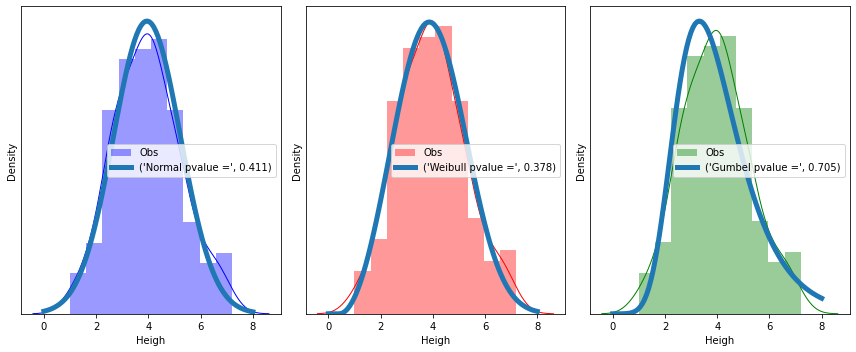

In [200]:
emp_mean = np.mean(Height)
emp_stand_dev = np.std(Height)
#pvalue normal
n=15
df=n-1-2
hist_values = np.linspace(0.9,7.7,n)
hist_norm_cdf = scp.stats.norm.cdf(hist_values,loc=emp_mean,scale=emp_stand_dev)
hist = np.zeros(n)
Tx = 0
erro = 0
hist_norm = np.zeros(n)
for i in range(len(hist_values)-1):
    hist[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_norm[i]=(hist_norm_cdf[i+1]-hist_norm_cdf[i])*149
    Tx += (hist[i]-hist_norm[i])**2/hist_norm[i]
    erro += (hist[i]-hist_norm[i])**2
print(1-scp.stats.chi2.cdf(df,Tx))
print(erro)
#pvalue weibull
weibull_cste = scp.stats.weibull_min.fit(Height)
hist_wei_cdf = scp.stats.weibull_min.cdf(hist_values,weibull_cste[0],weibull_cste[1],weibull_cste[2])
hist2 = np.zeros(n)
Tx2 = 0
hist_wei = np.zeros(n)
erro2=0
for i in range(len(hist_values)-1):
    hist2[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_wei[i]=(hist_wei_cdf[i+1]-hist_wei_cdf[i])*149
    Tx2 += (hist2[i]-hist_wei[i])**2/hist_wei[i]
    erro2 += (hist2[i]-hist_wei[i])**2
print(1-scp.stats.chi2.cdf((df-1),Tx2))
print(erro2)
gumbel_cste = scp.stats.gumbel_r.fit(Height)
hist_gum_cdf = scp.stats.gumbel_r.cdf(hist_values,gumbel_cste[0],gumbel_cste[1])
hist3 = np.zeros(n)
Tx3 = 0
hist_gum = np.zeros(n)
erro3 = 0
for i in range(len(hist_values)-1):
    hist3[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_gum[i]=(hist_gum_cdf[i+1]-hist_gum_cdf[i])*149
    Tx3 += (hist3[i]-hist_gum[i])**2/hist_gum[i]
    erro3 += (hist3[i]-hist_gum[i])**2
print(1-scp.stats.chi2.cdf(df,Tx3))
print(erro3)


fig, ax = plt.subplots(1,3,figsize=(12,5))
x = np.linspace(0,int(np.max(Height))+1,100)
sns.distplot(Height,color="red",ax=ax[1],label='Obs',kde_kws={"color": "r", "lw": 1})
ax[1].plot(x,scp.stats.weibull_min.pdf(x,weibull_cste[0],weibull_cste[1],weibull_cste[2]),lw=5,label = ("Weibull pvalue =", round(1-scp.stats.chi2.cdf(df-1,Tx2),3)))
ax[1].set_yticks([])
ax[1].set_xlabel('Heigh')
ax[1].legend()
sns.distplot(Height,color="blue",ax=ax[0],label='Obs',kde_kws={"color": "b", "lw": 1})
ax[0].plot(x,scp.stats.norm.pdf(x,loc=emp_mean,scale=emp_stand_dev),lw=5,label = ("Normal pvalue =", round(1-scp.stats.chi2.cdf(df,Tx),3)))
ax[0].set_yticks([])
ax[0].set_xlabel('Heigh')
ax[0].legend()
sns.distplot(Height,color="green",ax=ax[2],label='Obs',kde_kws={"color": "g", "lw": 1})
ax[2].plot(x,scp.stats.gumbel_r.pdf(x,gumbel_cste[0],gumbel_cste[1]),lw=5,label = ("Gumbel pvalue =", round(1-scp.stats.chi2.cdf(df,Tx3),3)))
ax[2].set_yticks([])
ax[2].set_xlabel('Heigh')
ax[2].legend()
plt.tight_layout()
plt.show()

Height determination

6.118126453750775
7.00009997712942


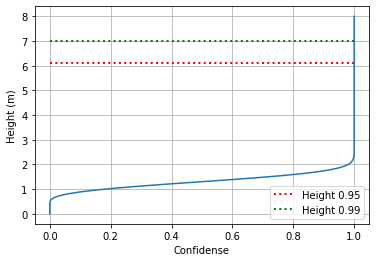

In [202]:
print(scp.stats.weibull_min.ppf(0.95,weibull_cste[0],weibull_cste[1],weibull_cste[2]))
print(scp.stats.weibull_min.ppf(0.99,weibull_cste[0],weibull_cste[1],weibull_cste[2]))
plt.figure()
plt.plot(scp.stats.weibull_min.cdf(x,weibull_cste[0],weibull_cste[1]),x)
plt.plot(np.array([0,1]),np.array([1,1])*scp.stats.weibull_min.ppf(0.95,weibull_cste[0],weibull_cste[1],weibull_cste[2]),':r',lw=2,label='Height 0.95')
plt.plot(np.array([0,1]),np.array([1,1])*scp.stats.weibull_min.ppf(0.99,weibull_cste[0],weibull_cste[1],weibull_cste[2]),':g',lw=2,label='Height 0.99')
plt.grid(axis="both")
plt.xlabel("Confidense")
plt.ylabel("Height (m)")
plt.legend()
plt.show()